In [1]:
# Eggnog processing script

In [34]:
import re

# Rickettsia helvetica (Rh)
eggnog_file = "/home/bart/UNLOCK/Projects/PRJ_RIVM/ticks/Symbionts/Rickettsia_helvetica/final_assemblies/bakta/eggnog/Rh_bakta_all+ref_eggnog.tsv"
protein_sizes = "/home/bart/UNLOCK/Projects/PRJ_RIVM/ticks/Symbionts/Rickettsia_helvetica/final_assemblies/bakta/Rh_bakta_proteins_all+ref.proteinlength.tsv"
species = "Rickettsia helvetica"

# Midichloria mitochondrii (Mm)
# eggnog_file = "/home/bart/UNLOCK/Projects/PRJ_RIVM/ticks/Symbionts/Midichloria/ena_bakta/eggnog/Mm_bakta_all+ref_eggnog.tsv"
# protein_sizes = "/home/bart/UNLOCK/Projects/PRJ_RIVM/ticks/Symbionts/Midichloria/ena_bakta/Mm_bakta_proteins_all+ref.proteinlength.tsv"
# species = "Midichloria mitochondrii"

strain_names = {
    "DK2RH":"DK",
    "DOBRH":"DOB",
    "IRD1RH":"Ir_d1",
    "IRD4RH":"Ir_d4",
    "IRD5RH":"Ir_d5",
    "IRD9RH":"Ir_d9",
    "IRF11RH":"Ir_f11",
    "IRF12RH":"Ir_f12",
    "IRF16RH":"Ir_f16",
    "IRF1RH":"Ir_f1",
    "RHREF":"C9P9",
    "F2MM": "F2",
    "IRD2MM": "Ir_d2",
    "IRD3MM": "Ir_d3",
    "IRD4MM": "Ir_d4",
    "IRD7MM": "Ir_d7",
    "IRD9MM": "Ir_d9",
    "IRF11MM": "Ir_f11",
    "IRF16MM": "Ir_f16",
    "IRF1MM": "Ir_f1",
    "IRF3MM": "Ir_f3",
    "IRF6MM": "Ir_f6",
    "MMREF": "IricVA",  
}

info = {}
matrix = []
for line in open(eggnog_file):
    if line.startswith("#"):
        continue
    line = line.strip().split("\t")
    locus = line[0]
    
    cog = line[4]
    strain = strain_names[locus.split("_")[0]]
    if strain not in info:
        info[strain] = {}
    if locus not in info[strain]:
        info[strain][locus] = set()
    # if cog.startswith("COG"):
    # Obtain all COG values from a string using regex
    hits = re.findall(r'COG\d+', cog)
    for cog in hits:
        info[strain][locus].add(cog)

for strain in info:
    # Count COGs in list
    counts = {}
    for locus in info[strain]:
        for cog in info[strain][locus]:
            if cog not in counts:
                counts[cog] = 0
            counts[cog] += 1
    # Print COG counts
    for cog in counts:
        matrix.append([strain, cog, counts[cog]])

In [35]:
 # Turn three column matrix into a pandas table
import pandas as pd
df = pd.DataFrame(matrix, columns=[species+" strain", "COG", "count"])
df = df.pivot(index=species+" strain", columns="COG", values="count")
df = df.fillna(0)
df.to_csv("eggnog_matrix.csv")

# Remove all rows with the same value using the standard deviation
df = df.loc[:, df.std() != 0]

# Remove specific COGs
#df = df.drop('COG5430', axis=1)
df



COG                          COG0110  COG0174  COG0201  COG0237  COG0242  \
Rickettsia helvetica strain                                                
C9P9                             1.0      1.0      2.0      2.0      3.0   
DK                               1.0      0.0      1.0      1.0      4.0   
DOB                              2.0      0.0      1.0      1.0      3.0   
Ir_d1                            1.0      0.0      1.0      1.0      3.0   
Ir_d4                            2.0      0.0      1.0      1.0      3.0   
Ir_d5                            1.0      0.0      1.0      1.0      3.0   
Ir_d9                            1.0      0.0      1.0      1.0      3.0   
Ir_f1                            2.0      0.0      1.0      1.0      3.0   
Ir_f11                           1.0      0.0      1.0      1.0      3.0   
Ir_f12                           2.0      0.0      1.0      1.0      3.0   
Ir_f16                           2.0      0.0      1.0      1.0      3.0   

COG                          COG0267  COG0275  COG0343  COG0438  COG0445  ...  \
Rickettsia helvetica strain                                               ...   
C9P9                             1.0      2.0      1.0      3.0      2.0  ...   
DK                               1.0      1.0      1.0      4.0      1.0  ...   
DOB                              1.0      1.0      1.0      3.0      1.0  ...   
Ir_d1                            1.0      1.0      1.0      3.0      1.0  ...   
Ir_d4                            1.0      1.0      1.0      3.0      1.0  ...   
Ir_d5                            0.0      1.0      1.0      3.0      1.0  ...   
Ir_d9                            1.0      1.0      1.0      3.0      1.0  ...   
Ir_f1                            1.0      1.0      1.0      3.0      1.0  ...   
Ir_f11                           1.0      1.0      1.0      3.0      1.0  ...   
Ir_f12                           1.0      1.0      2.0      3.0      1.0  ...   
Ir_f16                           1.0      1.0      1.0      3.0      1.0  ...   

COG                          COG2358  COG2801  COG3064  COG3468  COG3471  \
Rickettsia helvetica strain                                                
C9P9                             2.0     20.0      2.0      9.0      1.0   
DK                               1.0     13.0      2.0      9.0      1.0   
DOB                              1.0     13.0      2.0      9.0      2.0   
Ir_d1                            1.0     13.0      2.0      9.0      1.0   
Ir_d4                            1.0     13.0      3.0     10.0      1.0   
Ir_d5                            1.0     13.0      3.0     10.0      1.0   
Ir_d9                            1.0     13.0      2.0      9.0      1.0   
Ir_f1                            1.0     13.0      2.0      9.0      1.0   
Ir_f11                           1.0     13.0      2.0      9.0      1.0   
Ir_f12                           1.0     13.0      2.0      9.0      1.0   
Ir_f16                           1.0     13.0      2.0      9.0      1.0   

COG                          COG3547  COG3637  COG4643  COG5430  COG5464  
Rickettsia helvetica strain                                               
C9P9                             8.0      3.0      3.0      0.0     21.0  
DK                               8.0      3.0      2.0      0.0     21.0  
DOB                              9.0      4.0      3.0      0.0     21.0  
Ir_d1                            8.0      3.0      3.0      0.0     21.0  
Ir_d4                            8.0      3.0      3.0      0.0     22.0  
Ir_d5                            8.0      3.0      3.0      1.0     22.0  
Ir_d9                            8.0      3.0      3.0      0.0     21.0  
Ir_f1                            8.0      3.0      3.0      0.0     21.0  
Ir_f11                           8.0      3.0      3.0      0.0     21.0  
Ir_f12                           8.0      3.0      3.0      0.0     21.0  
Ir_f16                           8.0      3.0      3.0      0.0     

<Axes: xlabel='Rickettsia helvetica strain', ylabel='COG'>

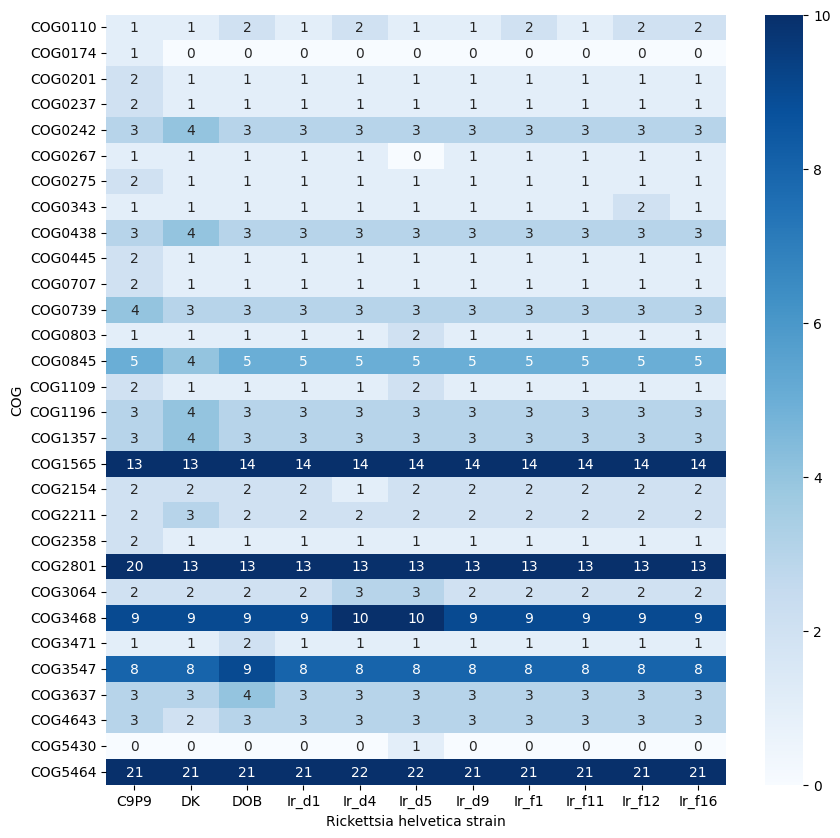

In [36]:
# Plot a heatmap using the pandas dataframe called matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Create a heatmap with a number in the middle of each cell
plt.figure(figsize=(10, 10))
sns.heatmap(df.T, cmap="Blues", annot=True, fmt="g",vmax=10)
#plt.savefig("Rh_COG_eggnog_heatmap.png", dpi=300)
#plt.close()


<Axes: xlabel='Rickettsia helvetica strain', ylabel='COG'>

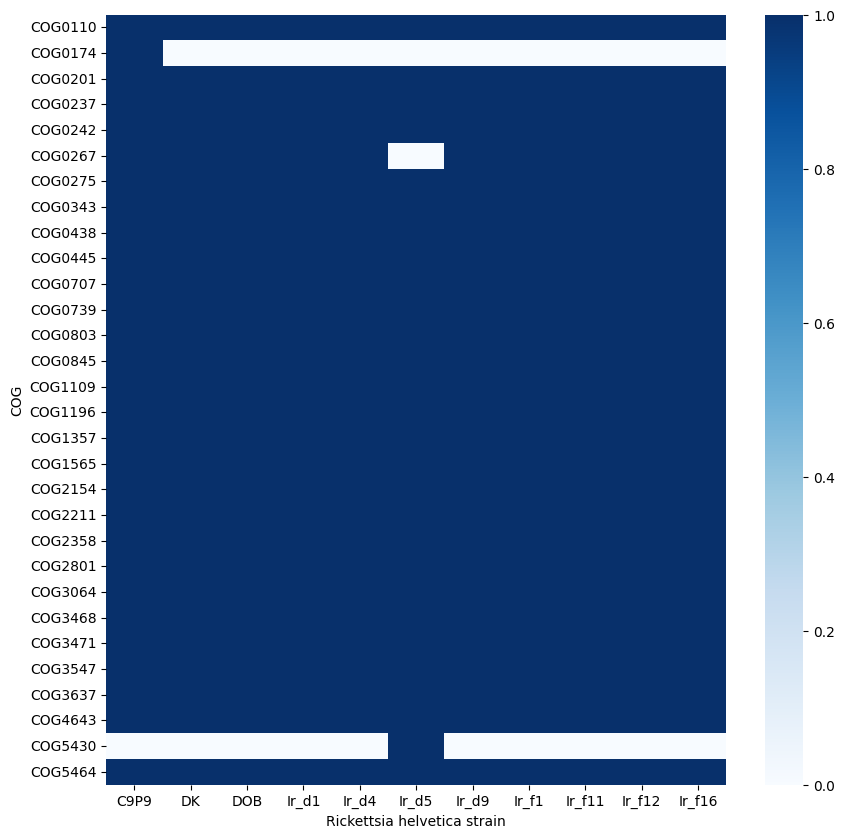

In [38]:
 # Turn three column matrix into a pandas table
# import pandas as pd
# bin_df = pd.DataFrame(matrix, columns=[species+" strain", "COG", "count"])
# bin_df = bin_df.pivot(index=species+" strain", columns="COG", values="count")
# bin_df = bin_df.fillna(0)
# bin_df.to_csv("eggnog_matrix_binary.csv")

# # Turn the matrix into a binary matrix
# bin_df[bin_df > 0] = 1
# # Remove all rows with the same value using the standard deviation
# bin_df = bin_df.loc[:, bin_df.std() != 0]
# bin_df


#  BINARY HEATMAP
import seaborn as sns
import matplotlib.pyplot as plt
#Not all rows are shown on the figure
plt.figure(figsize=(10, 10))
sns.heatmap(df.T, cmap="Blues",vmax="1")
# # plt.savefig("eggnog_heatmap.png", dpi=300)
# # plt.close()


In [39]:
# Locus lookup for COG numbers

COG = "COG0201" # Stop codon
COG = "COG0438"
COG = "COG0445" # Stop codon
COG = "COG0707" # Stop codon
COG = "COG0739" # Partial duplication
COG = "COG1109" # 2 strain stop codon
COG = "COG1196" # Stop codon
COG = "COG1396" # Missing
COG = "COG2226" # 
COG = "COG2358" # Stop codon
COG = "COG3637" # Stop codon
COG = "COG5430" # 

# Rickettsia helvetica (Rh)
protein_sizes = "/home/bart/UNLOCK/Projects/PRJ_RIVM/ticks/Symbionts/Rickettsia_helvetica/final_assemblies/bakta/Rh_bakta_proteins_all+ref.proteinlength.tsv"
# Midichloria mitochondrii (Mm)
#protein_sizes = "/home/bart/UNLOCK/Projects/PRJ_RIVM/ticks/Symbionts/Midichloria/ena_bakta/Mm_bakta_proteins_all+ref.proteinlength.tsv"

info = {}
matrix = []

length_lookup = {}
for line in open(protein_sizes):
    line = line.strip().split("\t")
    locus = line[0]
    length = int(line[1])
    length_lookup[locus] = length

COGS = list(df.columns.values)
for COG in COGS:
    for line in open(eggnog_file):
        if line.startswith("#"):
            continue
        if COG in line:
            line = line.strip().split("\t")
            locus = line[0]
            cog = line[4]
            strain = locus.split("_")[0]
            print(COG, strain, locus, length_lookup[locus], sep="\t")

COG0110	DK2RH	DK2RH_05925	82
COG0110	DOBRH	DOBRH_06790	82
COG0110	DOBRH	DOBRH_06795	40
COG0110	IRD1RH	IRD1RH_05920	82
COG0110	IRD4RH	IRD4RH_05935	82
COG0110	IRD4RH	IRD4RH_05940	40
COG0110	IRD5RH	IRD5RH_05910	82
COG0110	IRD9RH	IRD9RH_05920	82
COG0110	IRF11RH	IRF11RH_05920	82
COG0110	IRF12RH	IRF12RH_05925	82
COG0110	IRF12RH	IRF12RH_05930	40
COG0110	IRF16RH	IRF16RH_05915	82
COG0110	IRF16RH	IRF16RH_05920	40
COG0110	IRF1RH	IRF1RH_05920	82
COG0110	IRF1RH	IRF1RH_05925	40
COG0110	RHREF	RHREF_02245	82
COG0174	RHREF	RHREF_01610	167
COG0201	DK2RH	DK2RH_00410	433
COG0201	DOBRH	DOBRH_01270	433
COG0201	IRD1RH	IRD1RH_00410	433
COG0201	IRD4RH	IRD4RH_00410	433
COG0201	IRD5RH	IRD5RH_00410	433
COG0201	IRD9RH	IRD9RH_00410	433
COG0201	IRF11RH	IRF11RH_00410	433
COG0201	IRF12RH	IRF12RH_00410	433
COG0201	IRF16RH	IRF16RH_00410	433
COG0201	IRF1RH	IRF1RH_00410	433
COG0201	RHREF	RHREF_07830	327
COG0201	RHREF	RHREF_07835	49
COG0237	DK2RH	DK2RH_01185	190
COG0237	DOBRH	DOBRH_02045	190
COG0237	IRD1RH	IRD1RH_01185	190